# Distribuição Chi-Quadrado 

Para cada $m$ positivo, a distribuição $Gamma(m/2, 1/2)$ é chamada de distribuição $\chi^2$. Ela foi primeiramente descrita por Helmert para computar a distribuição amostral de uma população normal. Vamos ver como a normal se relaciona mais a frente. 

$$
f(x) = \frac{1}{2^{m/2}\Gamma(m/2)}x^{m/2 - 1}e^{-x/2}
$$


## Propriedades

Se $X \sim \chi^2(m)$, então:

$$
E(X) = m
$$

$$
Var(X) = 2m
$$

$$
\psi(t) = \left(\frac{1}{1-2t}\right)^{m/2}, t < \frac{1}{2}
$$

## Soma de $\chi^2$

Se $X_1, ..., X_k$ são independentes e cada uma tem grau de liberdade $m_i$, então $X_1 + ... + X_n$ tem distribuição $\chi^2(m_1 + .... + m_k)$

## Relação com a Normal

Se $X$ tem distribuição normal padrão, $Y = X^2 \sim \chi^2(1)$

De fato, se juntarmos as últimos dois teoremas, veremos que a soma de quadrados de normais independentes e identicamente distribuidas será $\chi^2(m)$, onde $m$ é o número de parcelas. 

## Implementação

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chi2

from matplotlib import animation, cm
from IPython.display import HTML

In [6]:
degree_freedom = 10
mean, var, skew, kurt = chi2.stats(degree_freedom, moments = 'mvsk')
print('Propriedades')
print('Média: {}'.format(mean))
print('Var: {}'.format(var))
print('Assimetria: {}'.format(skew))
print('Curtose: {}'.format(kurt))

Propriedades
Média: 10.0
Var: 20.0
Assimetria: 0.8944271909999159
Curtose: 1.2


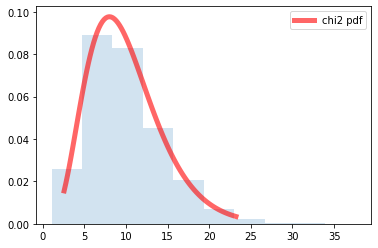

In [19]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(chi2.ppf(0.01, degree_freedom), 
                chi2.ppf(0.99, degree_freedom), 100)
ax.plot(x, chi2.pdf(x, degree_freedom), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

r = chi2.rvs(degree_freedom, size = 10000)
ax.hist(r, density = True, alpha = 0.2)

ax.legend()

plt.show()

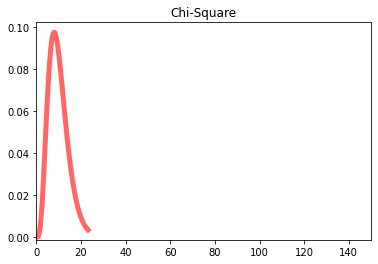

In [46]:
fig, ax = plt.subplots()

line, = ax.plot(x, chi2.pdf(x, degree_freedom), 'r-', lw=5, alpha=0.6)

ax.set_xlim((0,150))
ax.set_title('Chi-Square')

def animate(i, degree_freedom):
    
    x = np.linspace(0, chi2.ppf(0.99, degree_freedom + i), 100)

    line.set_data(x, chi2.pdf(x, degree_freedom + i))
    
    return line,

anim = animation.FuncAnimation(fig, animate, frames = 100,
                               interval = 50, fargs=(degree_freedom,), repeat = False)
HTML(anim.to_html5_video())

# Distribuição Conjunta da média e variância amostrais

$X_1,...,X_n$ formam uma amostra aleatória com distribuição normal e com média $\mu$ e variância $\sigma^2$ desconhecidos. Estamos interessados na distribuição conjunta dos estimadores de máxima verossimilhança para média e variância da amostra. 

## Teorema de Basu

Sejam $\hat{\mu} = \bar{X}_n$ e $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (X_i - \bar{X}_n)^2$ a média e variância amostrais, respectivamente. Então $\hat{\mu}$ tem distribuição normal com média $\mu$ e variância $\sigma^2 /n$, enquanto $\hat{\sigma}^2$ tem a distribuição $\chi^2(n-1)$, isto é, com $n-1$ grau de liberdade. Além disso elas são independentes. 

Esse teorema é um pouco mais complexo e, na verdade, essa seria uma espécie de aplicação do teorema, na verdade. O teorema de Basu diz que: 

> Se $T$ é uma estatística suficiente [completa](https://lucasmoschen.github.io/TA_sessions/infestatistica/SufficientStatistics/#definicoes-adicionais) (Considere, nesse teorema, $g$ uma função integrável limitada) para $\theta$ e $A$ uma estatística ancillary, então $T$ é independente de $A$. Nesse caso $\hat{\mu}$ é completa suficiente e $\hat{\sigma}^2$ é ancillary, por que não depende de $\mu$. 

O mais interessante é que essa propriedade é só vista com a [distribuição normal](https://arxiv.org/pdf/1810.01768.pdf)! Olhem a página 9.  

### Demonstração 

O livro tem uma abordagem um pouco mais voltado à Álgebra Linear. Aqui vou mostrar uma ideia um pouco diferente, onde vocês podem demonstrar os passos, como exercício. 

1. Passo 1: $\sum_{i=1}^n X_i^2 = n\hat{\sigma}^2 + n\hat{\mu}^2$

    - Dica: Escrever $\hat{\sigma}^2$ e abrir em três somatórios. 

2. Passo 2: $\sum_{i=1}^n (X_i - \mu)^2 = n\hat{\sigma}^2 + n(\hat{\mu} - \mu)^2$

    - Dica: O Passo 1 é um caso especial do Passo 2. O processo é o mesmo.

3. Passo 3: $\hat{\mu}$ é independente de $X_i - \hat{\mu}, i = 1,...,n$.

    - Dica: Montar a pdf conjunta de $X_1, ..., X_n$ (já fizemos isso atraveś da verossimilhança) e fazer uma mudança de variável $Y_1 = \hat{\mu}, Y_2 = X_2 - \hat{\mu}, ..., Y_n = X_n - \hat{\mu}$. Com essa mudança, é possível montar a pdf como função de $y_1,...,y_n$. Esse processo é um pouco mais chato, mas é bom lembrar como fazez mudança de variável para pdfs. [Aqui você pode conferir como](https://en.wikipedia.org/wiki/Probability_density_function#Vector_to_vector). É importante lembrar que é uma função de $y$ após transformada e não de $x$. 
    - Dica 2: Fatorizar a pdf conjunta. Você vai ver como se destaca a independência aqui. 

4. Passo 4: Mostrar que $\hat{\mu}$ e $\hat{\sigma}^2$ são independentes. 


#### Referências

[1](https://jekyll.math.byuh.edu/courses/m321/handouts/mean_var_indep.pdf)
[2](http://www2.stat.duke.edu/courses/Fall18/sta611.01/Lecture/lec12_mean_var_indep.pdf)


## Simples visualização

Eu gostaria de comparar o que acontece com a média e variância amostral da distribuição normal e da distribuição gamma. Para isso, geero amostras de tamanho $n$, calculo as estatísticas e salvo. Faço esse procedimento o número de pontos que quiser. 

In [32]:
ite = 10000
n = 10000
# Parâmetros da Normal
mu = 5
sigma = 2
# Parâmetros da Gamma
alpha = 5
beta = 4

In [33]:
means = np.zeros((ite,2))
variances = np.zeros((ite,2))

for i in range(ite): 
    X = np.random.normal(loc = mu, scale = sigma, size = n)
    Y = np.random.gamma(shape = alpha, scale = 1/beta, size = n)
    
    means[i,0] = np.mean(X)
    means[i,1] = np.mean(Y)

    variances[i,0] = np.var(X, ddof = 0)
    variances[i,1] = np.var(Y, ddof = 0)

coef_normal = np.polyfit(x = means[:,0], y = variances[:,0], deg = 1)
coef_gamma = np.polyfit(x = means[:,1], y = variances[:,1], deg = 1)

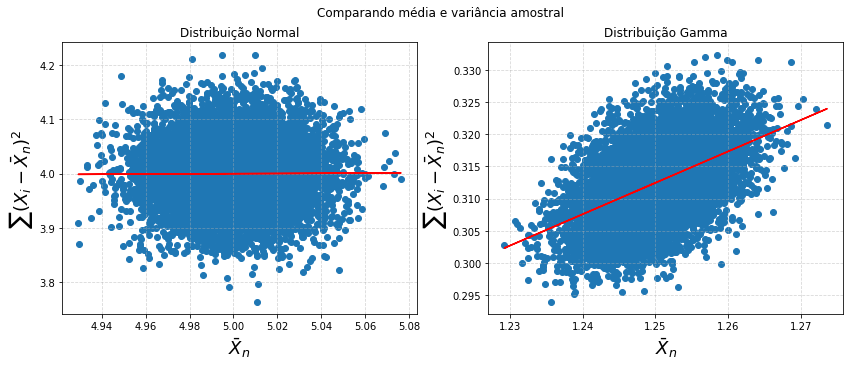

In [34]:
fig, ax = plt.subplots(1,2,figsize = (14,5))
fig.suptitle('Comparando média e variância amostral')

ax[0].scatter(means[:,0], variances[:,0])
ax[1].scatter(means[:,1], variances[:,1])
ax[0].plot(means[:,0], coef_normal[0]*means[:,0] + coef_normal[1], color = 'red')
ax[1].plot(means[:,1], coef_gamma[0]*means[:,1] + coef_gamma[1], color = 'red')


ax[0].set_xlabel(r'$\bar{X}_n$', fontsize = 18)
ax[1].set_xlabel(r'$\bar{X}_n$', fontsize = 18)
ax[0].set_ylabel(r'$\sum (X_i - \bar{X}_n)^2$', fontsize = 18)
ax[1].set_ylabel(r'$\sum (X_i - \bar{X}_n)^2$', fontsize = 18)
ax[0].set_title('Distribuição Normal')
ax[1].set_title('Distribuição Gamma')
ax[0].grid(alpha = 0.5, linestyle = '--')
ax[1].grid(alpha = 0.5, linestyle = '--')
plt.show()

*Obs: A não inclinação da reta não significa que existe independência, mas como são independentes, a gente espera que a inclinação seja pequena.* 

# Distribuições T Student 

[Artigo original](http://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf)

### Definição 

Sejam $Y \sim \chi^2(m)$ e $Z \sim N(0,1)$ independentes. Então 

$$
X = \frac{Z}{\left(\frac{Y}{m}\right)^{1/2}} \sim t(m)
$$

onde $t(m)$ é a distribuição t-student com $m$ graus de liberdade. 

## Função densidade de probabilidade 

$$
f(x) = \frac{\Gamma\left(\frac{m+1}{2}\right)}{(m\pi)^{1/2}\Gamma\left(\frac{m}{2}\right)}\left(1 + \frac{x^2}{m} \right)^{-(m+1)/2}, x \in \mathbb{R},
$$

onde $\Gamma$ é a [função Gamma](https://en.wikipedia.org/wiki/Gamma_function), tal que, 

1. $n \in \mathbb{N}, \Gamma(n) = (n-1)!$
2. $\Gamma(z+1) = z\Gamma(z)$ 
3. $\Gamma(1/2) = \sqrt{\pi}$

Quando $m \leq 1$, a média é divergente. Isso pode ser vizualizado pelo expoente que será $\leq -1$, o que diverge (lembre de $\int 1/x$). Quando $m > 1$, a média existe e é 0 pela simetria da distribuição. Em particular, podemos mostrar que se $k < m$, $E[|X^k|] < + \infty$ e se $k \geq m$, o momento diverge. 

Se $X \sim t(m), m > 2$, $Var(X) = \frac{m}{m-2}$


